# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [359]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [360]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [20]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [92]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


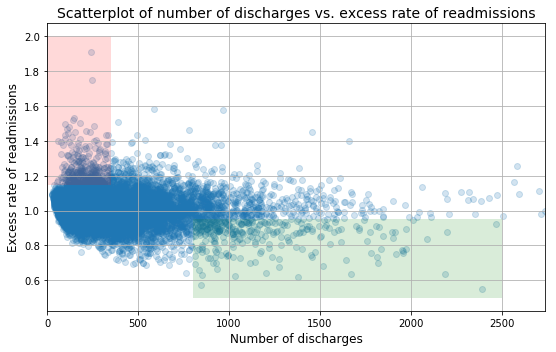

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## A. Do you agree with the above analysis and recommendations? Why or why not?
There are not enough proofs and analysis that make me confident and agree with the result of this study, thus I have to disagree with the work above. It would be nicer to have a descriptive statistics and precise hypothesis statements. In addition, the analyst didn't take time to explore the data set thoroughly because at first look, the sample seems to contain missing values. The conclusion from the analyst was based solely on the last graph. The analyst also affirmed that there is a significant correlation between number of discharges and readmission rate despite no test was presented. With these weaks analysis, the analyst was not fit to give out recommendation. 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:


In [361]:
#Explore the data set and visualize some aspect of the data
df=hospital_read_df
df.head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013


In [485]:
#df.groupby('Number of Discharges')['Number of Discharges'].count()
a= df[df['Number of Discharges']!='Not Available']["Number of Discharges"].count()
b=df[df['Number of Discharges']=='Not Available']["Number of Discharges"].count()
c=df[df['Number of Discharges']=='Not Available']["Excess Readmission Ratio"].count()
print a, b, c
ratio= float(b)/len(df)*100
ratio2= float(c)/b*100
print ("Ratio of Missing value in Number of Discharges: %.2f%%") % ratio
print ("Ratio of Excess Readmission among the missing value: %.2f%%") % ratio2

11578 5282 2234
Ratio of Missing value in Number of Discharges: 31.33%
Ratio of Excess Readmission among the missing value: 42.29%


In [486]:
df.columns

Index([u'Hospital Name', u'Provider Number', u'State', u'Measure Name',
       u'Number of Discharges', u'Footnote', u'Excess Readmission Ratio',
       u'Predicted Readmission Rate', u'Expected Readmission Rate',
       u'Number of Readmissions', u'Start Date', u'End Date'],
      dtype='object')

In [487]:
#Exclude all the observations that has excess readmission ratio less than 1
clean_df= df[df["Excess Readmission Ratio"].notnull()]
Ex_df= df[(df['Excess Readmission Ratio'] >=1) & (df["Number of Discharges"] !="Not Available")]
NotEx_df= df[(df['Excess Readmission Ratio'] <1) & (df["Number of Discharges"] !="Not Available")]
x= float(len(Ex_df))/len(df) *100
print ("Ratio of ERR within total sample: %.2f%%") % x

Ratio of ERR within total sample: 35.29%


In [488]:
#which top 5 state that have the highest ERR
Ex_df.groupby('State')["Excess Readmission Ratio"].count().sort_values(ascending=False).head(5)

State
CA    454
NY    421
FL    392
TX    350
IL    335
Name: Excess Readmission Ratio, dtype: int64

In [489]:
#the top condition for readmission is Heart Failure (HF)
Ex_df.groupby('Measure Name')["Measure Name"].count().sort_values(ascending=False).head(1)

Measure Name
READM-30-HF-HRRP    1440
Name: Measure Name, dtype: int64

In [490]:
#convert Number of Discharges to integer
Ex_df["Number of Discharges"]=Ex_df["Number of Discharges"].astype(int)
#Remove Start Date, End Date, Footnote out of the data set because they are unnescessary. 
Ex_df=Ex_df.drop(["Start Date", "End Date", "Footnote"], axis=1)
Ex_df.describe()

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Provider Number,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000
mean,254612.042689,350.481681,1.072958,19.134437,17.954017,70.509916
std,149330.070483,294.146368,0.068870,5.684807,5.377508,65.334500
min,10001.000000,25.000000,1.000000,4.400000,4.000000,11.000000
25%,110186.000000,151.000000,1.025600,17.600000,16.800000,27.000000
50%,250034.000000,269.000000,1.056000,20.300000,19.100000,51.000000
75%,370056.750000,460.000000,1.097700,22.800000,21.500000,92.000000
max,670082.000000,3570.000000,1.909500,32.800000,28.000000,879.000000


In [491]:
Avg_readmission_discharges=float(70.51)/float(350.48)*100
print Avg_readmission_discharges

20.118123716


In [492]:
#There is no missing value in ERR
Ex_df[Ex_df["Excess Readmission Ratio"]==False]["Excess Readmission Ratio"].isnull().count()

0

In [493]:
#calculate the correlation
import seaborn as sns
corr_df=Ex_df[['Number of Discharges', "Number of Readmissions", "Excess Readmission Ratio"]]
corr=corr_df.corr()
corr

,Number of Discharges,Number of Readmissions,Excess Readmission Ratio
Number of Discharges,1.000000,0.875542,0.067032
Number of Readmissions,0.875542,1.000000,0.035075
Excess Readmission Ratio,0.067032,0.035075,1.000000


**The correlation between number of discharges and number of readmissions is very strong, 0.876 indicating both values have strong relationship. **

## 1. Setup an appropriate hypothesis test: 
The previous analyst believe there is a significant difference in mean of ERR between the hospital/facilities that have discharges < 100 and >1000. Therefore, we will explore this difference in more statistically with hypothesis statement as below: 
 - Null hypothesis: There is no significant difference in mean of ERR between hospital/facilities having < 100 and >1000
 - Alternative hypothesis: There is a significant difference in mean of ERR between hospital/facilities having < 100 and >1000

## 2. Compute and report the observed significance value (or p-value): 
In order to calculate the significance value, I have to divide the data set into two group: hospital/facilities having < 100 discharges and >1000 discharges. 

In [494]:
#Divide the data set into small hospitals and large hospitals
clean_df[clean_df['Number of Discharges']== "Not Available"]=0
clean_df['Number of Discharges'] = clean_df['Number of Discharges'].astype(int)
small_df= clean_df[(clean_df['Number of Discharges']< 100) & (clean_df['Number of Discharges']>0) ]
large_df= clean_df[clean_df["Number of Discharges"]> 1000]
#large_df.head(3)

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/keangcheangung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [495]:
#mean of each group
print ("SMALL HOSPITALS: ")
print ("- size of small_df: %.2f") % len(small_df['Number of Discharges'])
print ("- mean of number of discharge: %.2f") % small_df['Number of Discharges'].mean()
print ("- mean of ERR: %.2f") % small_df['Excess Readmission Ratio'].mean()

print ("\nLarge HOSPITALS: ")
print ("- size of large_df: %.2f") % len(large_df['Number of Discharges'])
print ("- mean of number of discharge: %.2f") % large_df['Number of Discharges'].mean()
print ("- mean of ERR: %.2f") % large_df['Excess Readmission Ratio'].mean()

SMALL HOSPITALS: 
- size of small_df: 1188.00
- mean of number of discharge: 74.72
- mean of ERR: 1.02

Large HOSPITALS: 
- size of large_df: 463.00
- mean of number of discharge: 1383.43
- mean of ERR: 0.98


In [497]:
import scipy.stats as st
#determine the statistics and p-value
stat=st.ttest_ind(small_df['Excess Readmission Ratio'], large_df['Excess Readmission Ratio'])
print ('t-statistics: %.2f and p_value: %.5f') % (stat[0], stat[1])

t-statistics: 10.06 and p_value: 0.00000


**The p_value is below 5% significance level which means we have to reject the null hypothesis. The result shows there is significance difference in mean of ERR between hospital/facilities having less than 100 discharges and have more than 1000 discharges. **

## 3. Report statistical significance for  α  = .01 
It makes no difference when alpha is 1% because the p_value calculated above is extremely small. We still reject the null hypothesis. 

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
- For the statistical significance, the result from above shows there is a significance difference in mean of ERR between the small and large hospital/facitlites. However, it doesn't reflect any results on practical significance which is more applicable in the real situation.

In [498]:
#If we assume that the number of discharges determine the size of the hospital/facilities then: 
discharge300= clean_df[clean_df['Number of Discharges']<=300]
print ("Number of hospital/facilities with 300 discharges or less: %.f hospitals") % (discharge300["Number of Discharges"].count())
stat2= discharge300.describe()
stat2.loc["mean":"std", ["Excess Readmission Ratio", "Number of Readmissions", "Expected Readmission Rate"]]

Number of hospital/facilities with 300 discharges or less: 8366 hospitals


,Excess Readmission Ratio,Number of Readmissions,Expected Readmission Rate
mean,0.743419,22.950634,13.484748
std,0.454260,19.288624,8.914897


- There is a error in categorizing hospital size in previous analyst. According to above result, the hospital/facilities with less than or equal 300 discharges should survive without any problems as their excess readmissions ratio is actually less than 1 (0.74). Compared to the hospitals with less than 100 discharges who has 1.02 ERR, this 100-size hospitals are the one that need more attentions and receive more funds to upgrade resources allocation in order to reduce their readmission rate. 

## 5a. What are the advantages and disadvantages of using this plot to convey information?
Advantages: 
- show the correlation between variables 
- show the crowd of data points on the graph very well
- distinct colors make the viewers understand better

Disadvantages: 
- the slice between 81 to -3 is a little bit odd
- no clear distinction between the small hospitals and large hospitals

## 5b. Construct another plot that conveys the same information in a more direct manner.

In [549]:
hosp1=clean_df[clean_df['Excess Readmission Ratio']<1]
hosp2=clean_df[clean_df['Excess Readmission Ratio']>=1]

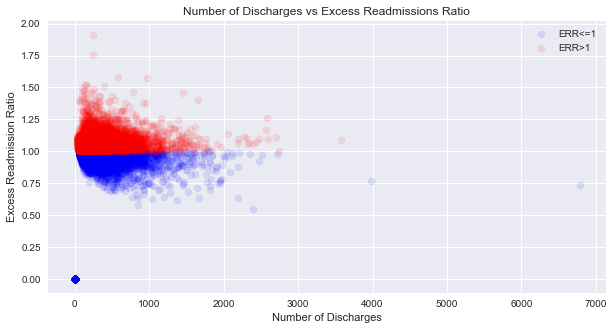

In [551]:
fig, ax = plt.subplots(figsize=(10,5))
#plot the graph
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='b', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend();